Libraries imported


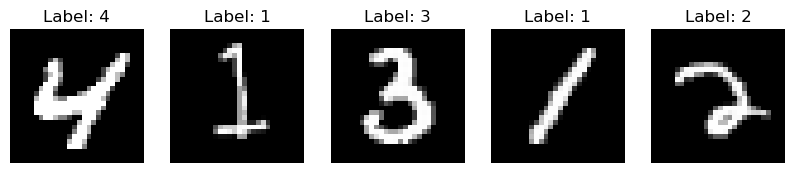

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4717 - accuracy: 0.8498 - val_loss: 0.0544 - val_accuracy: 0.9816 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1992 - accuracy: 0.9394 - val_loss: 0.0313 - val_accuracy: 0.9888 - lr: 0.0010
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1566 - accuracy: 0.9530 - val_loss: 0.0260 - val_accuracy: 0.9896 - lr: 0.0010
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1337 - accuracy: 0.9599 - val_loss: 0.0249 - val_accuracy: 0.9921 - lr: 0.0010
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1204 - accuracy: 0.9638 - val_loss: 0.0268 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1112 - accuracy: 0.9669 - val_loss: 0.0210 - val_accuracy: 0.9926 - lr: 0.0010
Epoch 7/10
1875/1875 [==============================]

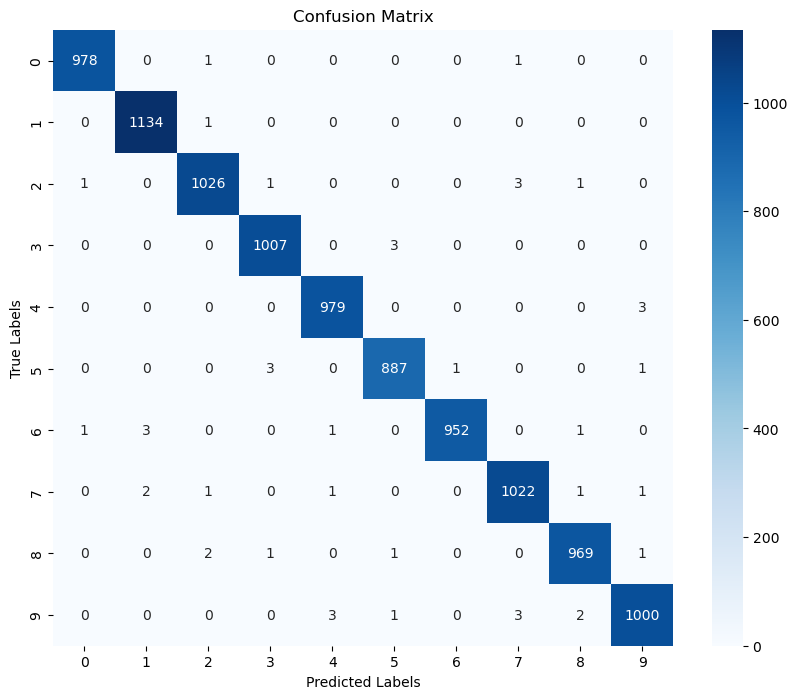

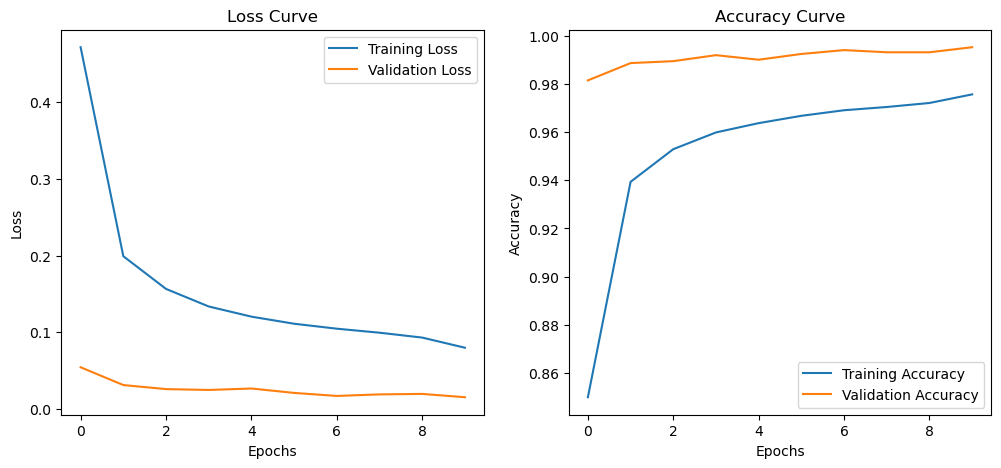

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("Libraries imported")

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize image pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to add channel dimension for CNN
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data visualization
def plot_sample_images(x, y, num_samples=5):
    """Visualize a few sample images and their labels."""
    indices = np.random.choice(range(x.shape[0]), num_samples, replace=False)
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {np.argmax(y[idx])}")
        plt.axis('off')
    plt.show()

plot_sample_images(x_train, y_train)

# Data augmentation
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
data_gen.fit(x_train)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    data_gen.flow(x_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
    ]
)

# Evaluate the model
results = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {results[1] * 100:.2f}%")

# Predict on the test dataset
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report for precision, recall, and F1 score
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)]))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Save the trained model
model.save('mnist_cnn_model.keras')
